<a href="https://colab.research.google.com/github/taraudani/finalproj/blob/main/Initial_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
#from google.colab import files
#_=files.upload()

In [3]:
aclr = pd.read_csv('cleaned_aclr_data.csv')

## **Graphs:**

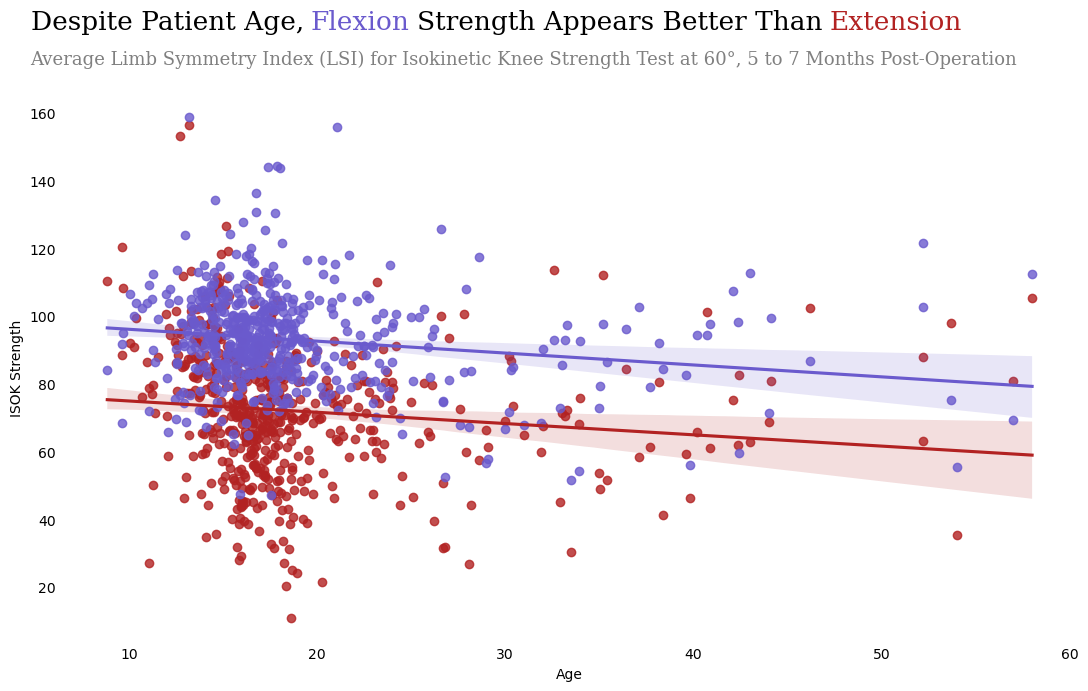

In [4]:
#filter data for only patients at 5 to 7 months post operation
aclr_filtered = aclr[aclr['tss_dashboard'] == '5 to 7 months']

#set figure size
plt.figure(figsize=(11, 7))

#melting data for isok variables, adding age to isok dataframe
isok = aclr_filtered[[col for col in aclr.columns if 'isok' in col]].copy()
isok['age'] = aclr_filtered['age']
isok = isok.melt(id_vars='age', var_name="Measurement", value_name="Value")
isok.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
isok.dropna(inplace=True)

#averaging value by age
isok_avg = isok.groupby(['age', 'Measurement'])['Value'].mean().reset_index()

#seperating into extension and flexion measurements
isok_measurements = isok_avg['Measurement'].unique()

#plotting isok regression plot
for m in isok_measurements:
    subset = isok_avg[isok_avg['Measurement'] == m]
    label = 'Extension' if 'ext' in m else 'Flexion'
    color = 'firebrick' if 'ext' in m else 'slateblue'
    sns.regplot(data=subset, x='age', y='Value', label= label, color = color, scatter=True)
plt.tick_params(axis='both', which='both', length=0)
plt.xlabel('Age')
plt.ylabel('ISOK Strength')

#adding title and subtitle
plt.title('Average Limb Symmetry Index (LSI) for Isokinetic Knee Strength Test at 60°, 5 to 7 Months Post-Operation',loc = 'left', x = -0.03, family = 'serif', pad = 20, fontsize=13, color='gray')
plt.text(-0.03, 1.15, 'Despite Patient Age,', va='top', family = 'serif', fontsize=19, transform=plt.gca().transAxes)
plt.text(0.245, 1.15, "Flexion", va='top', family = 'serif', color = 'slateblue', fontsize=19, transform=plt.gca().transAxes)
plt.text(0.35, 1.15, 'Strength Appears Better Than', va='top', family = 'serif', fontsize=19, transform=plt.gca().transAxes)
plt.text(0.755, 1.15, "Extension", va='top', family = 'serif', color = 'firebrick', fontsize=19, transform=plt.gca().transAxes)

#despine and tight layout
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()
plt.show()

In [5]:
acl_grouped = aclr.groupby('tss_dashboard').agg(
    mean_ext_mvic=('lsi_ext_mvic_90', 'mean'),
    mean_ext_mvic_60=('lsi_ext_mvic_60', 'mean'),
    mean_flex_mvic=('lsi_flex_mvic_60', 'mean'),
    mean_ext_isok=('lsi_ext_isok_60', 'mean'),
    mean_flex_isok=('lsi_flex_isok_60', 'mean'),
    mean_ikdc=('ikdc', 'mean'),
    mean_acl_rsi=('acl_rsi', 'mean'),
).reset_index()

In [6]:
new_order = [1,2,3,0,4,5]
acl_grouped = acl_grouped.iloc[new_order]
acl_grouped = acl_grouped.reset_index(drop=True)
acl_grouped = acl_grouped.drop(index=[1,2,4,5])

acl_grouped = acl_grouped.reset_index(drop=True)
acl_grouped

,tss_dashboard,mean_ext_mvic,mean_ext_mvic_60,mean_flex_mvic,mean_ext_isok,mean_flex_isok,mean_ikdc,mean_acl_rsi
0,3 to 4 months,75.192971,69.291246,76.021983,63.093288,81.837862,69.329736,54.784712
1,13 to 24 months,95.530889,76.286429,78.357143,79.723066,96.363400,82.771023,65.636093


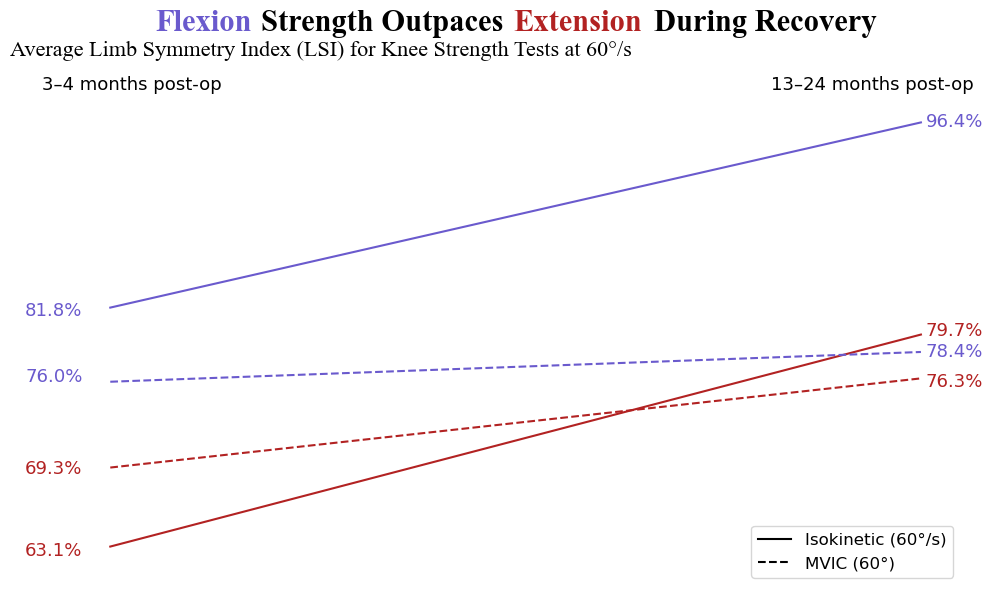

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

#graph slopes
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_ext_isok'], linestyle='-', color='firebrick', label='Extension Isokinetic')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_flex_isok'], linestyle='-', color='slateblue', label='Flexion Isokinetic')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_flex_mvic'], linestyle='--', color='slateblue', label='Flexion MVIC')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_ext_mvic_60'], linestyle='--', color='firebrick', label='Extension MVIC')

#remove unnecessary scaffolding
ax.set_ylim(60, 100)
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xticks([])
ax.set_xlabel('')
sns.despine(top=True, right=True, left=True, bottom=True)

#add a legend for line type
custom_legend = [
    Line2D([0], [0], color='black', linestyle='-', label='Isokinetic (60°/s)'),
    Line2D([0], [0], color='black', linestyle='--', label='MVIC (60°)')
]
ax.legend(handles=custom_legend, loc='lower right', fontsize=12)

#add color coded title (with degrees)
plt.text(0.15, 1.13, 'Flexion', ha='center', va='top', fontsize=22, color='slateblue', font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.35, 1.13, 'Strength Outpaces', ha='center', va='top', fontsize=22, font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.57, 1.13, 'Extension', ha='center', va='top', fontsize=22, color='firebrick', font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.78, 1.13, 'During Recovery', ha='center', va='top', fontsize=22, font='Times New Roman', fontweight='bold', transform=ax.transAxes)

#add a subtitle
plt.text(-0.067, 1.07, 'Average Limb Symmetry Index (LSI) for Knee Strength Tests at 60°/s',
         ha='left', va='top', fontsize=16, font='Times New Roman', transform=ax.transAxes)

#label the lines
plt.text(-0.05, 0.53, '81.8%', color='slateblue', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.9, '96.4%', color='slateblue', fontsize=13, transform=ax.transAxes)

plt.text(-0.05, 0.4, '76.0%', color='slateblue', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.45, '78.4%', color='slateblue', fontsize=13, transform=ax.transAxes)

plt.text(-0.05, 0.06, '63.1%', color='firebrick', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.49, '79.7%', color='firebrick', fontsize=13, transform=ax.transAxes)

plt.text(-0.05, 0.22, '69.3%', color='firebrick', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.39, '76.3%', color='firebrick', fontsize=13, transform=ax.transAxes)

#label axes
plt.text(0.07, 1, "3–4 months post-op", ha='center', va='top', fontsize=13, transform=ax.transAxes)
plt.text(0.9, 1, "13–24 months post-op", ha='center', va='top', fontsize=13, transform=ax.transAxes)
plt.tight_layout()


#### see the relationship between flexion strength and psychological readiness & isokinetic strength and psychological readiness

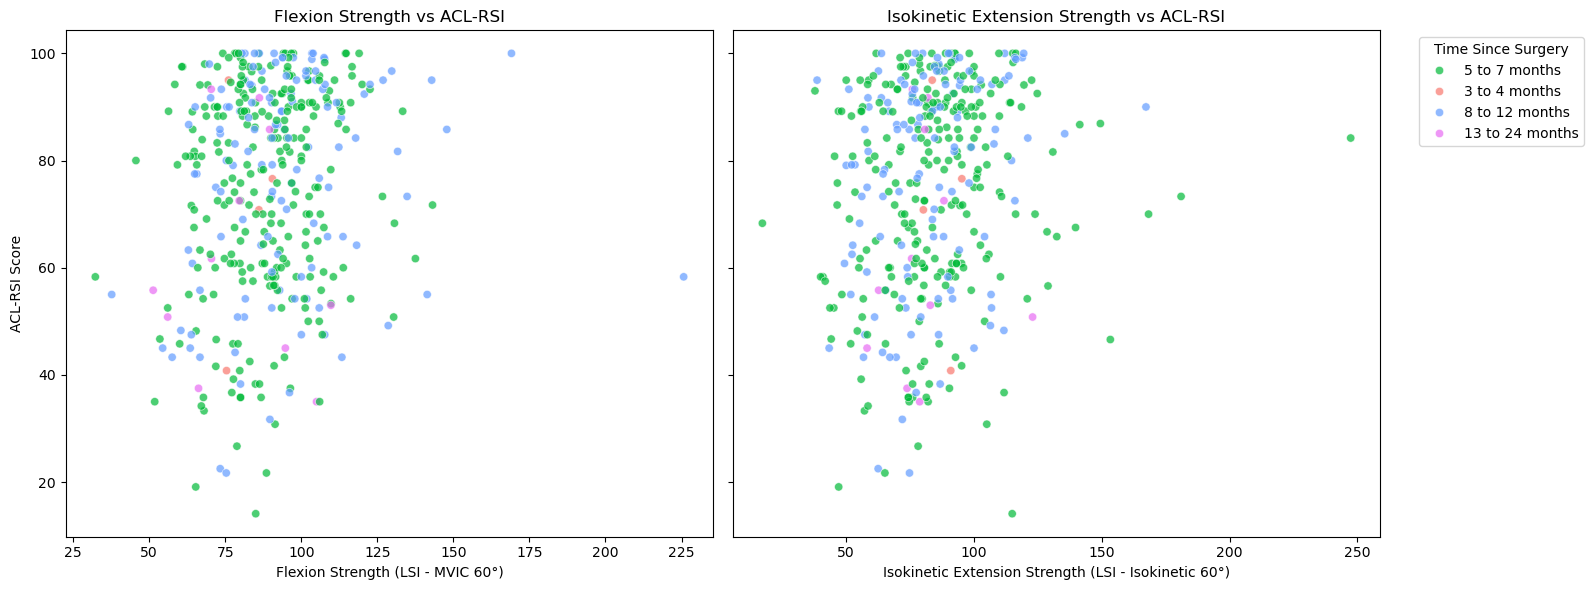

In [8]:

# Filter and clean the data
df_clean = aclr[['tss_dashboard', 'lsi_flex_mvic_60', 'lsi_ext_isok_60', 'acl_rsi']].dropna()
df_clean = df_clean[df_clean['tss_dashboard'] != 'Not Reported']

# Define a consistent order and color palette
hue_order = ['3 to 4 months', '5 to 7 months', '8 to 12 months', '13 to 24 months']
palette = {
    '3 to 4 months': '#F8766D',
    '5 to 7 months': '#00BA38',
    '8 to 12 months': '#619CFF',
    '13 to 24 months': '#E76BF3'
}

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Flexion Strength Plot
sns.scatterplot(
    data=df_clean,
    x='lsi_flex_mvic_60',
    y='acl_rsi',
    hue='tss_dashboard',
    palette=palette,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5,
    ax=axes[0]
)
axes[0].set_title("Flexion Strength vs ACL-RSI")
axes[0].set_xlabel("Flexion Strength (LSI - MVIC 60°)")
axes[0].set_ylabel("ACL-RSI Score")

# Extension Strength Plot
sns.scatterplot(
    data=df_clean,
    x='lsi_ext_isok_60',
    y='acl_rsi',
    hue='tss_dashboard',
    palette=palette,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5,
    ax=axes[1]
)
axes[1].set_title("Isokinetic Extension Strength vs ACL-RSI")
axes[1].set_xlabel("Isokinetic Extension Strength (LSI - Isokinetic 60°)")
axes[1].set_ylabel("")

# Adjust layout and legend
axes[1].legend(title="Time Since Surgery", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].legend_.remove()  # remove the left legend to avoid duplication
plt.tight_layout()
plt.show()


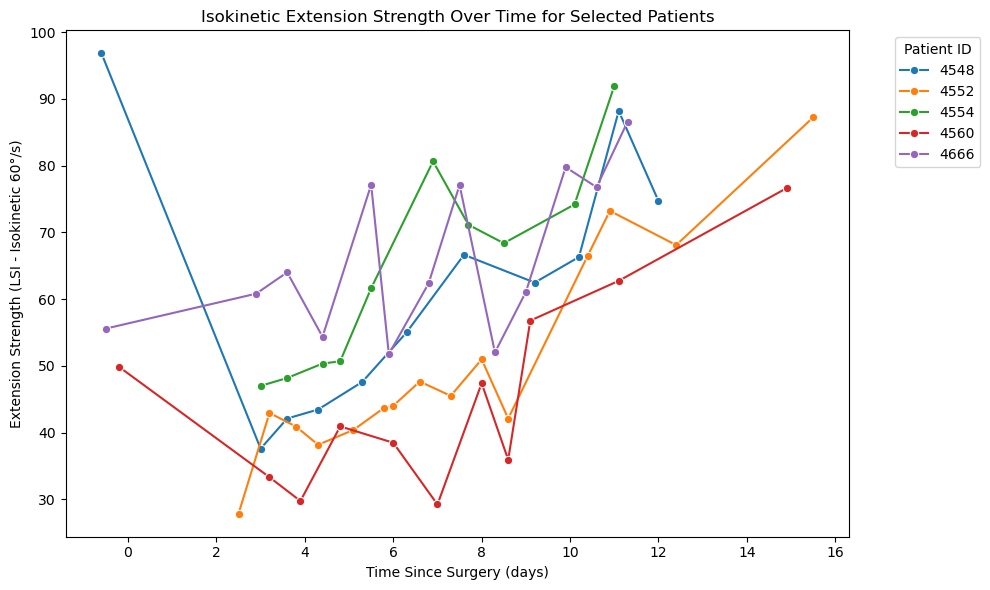

In [13]:
# Select top 5 patients with the most visits
top_patients = aclr['record_id'].value_counts().head(5).index
df_top = aclr[aclr['record_id'].isin(top_patients)]

# Plotting: Line plot with time on X-axis and extension strength on Y
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_top,
    x='tss',
    y='lsi_ext_isok_60',
    hue='record_id',
    marker='o',
    palette='tab10'
)

plt.title("Isokinetic Extension Strength Over Time for Selected Patients")
plt.xlabel("Time Since Surgery (days)")
plt.ylabel("Extension Strength (LSI - Isokinetic 60°/s)")
plt.legend(title='Patient ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


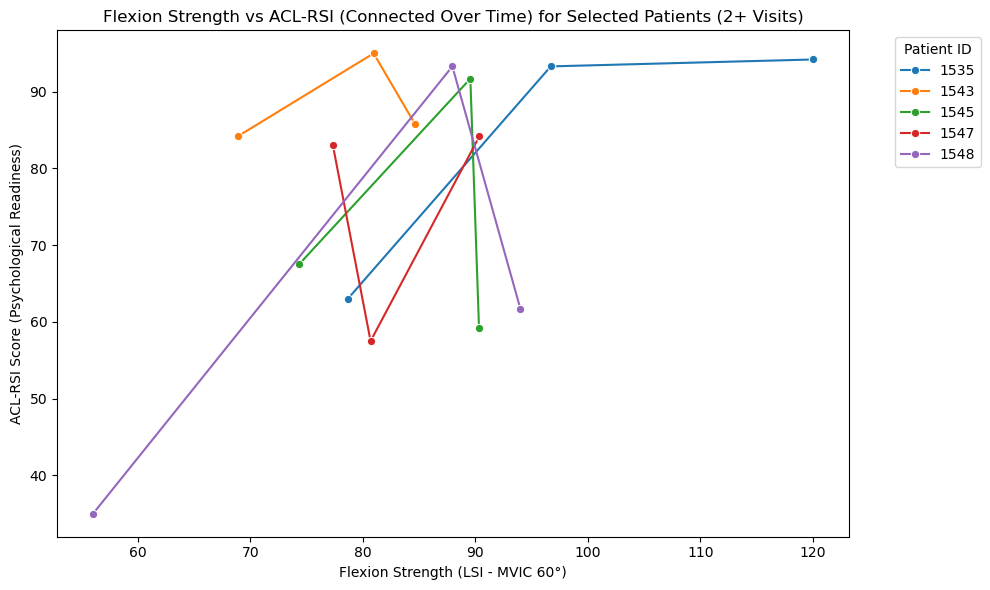

In [16]:
# Step 1: Drop rows with missing values for flexion strength, ACL-RSI, and tss
df_required_2 = aclr.dropna(subset=['lsi_flex_mvic_60', 'acl_rsi', 'tss'])

# Step 2: Find patients with at least 2 valid visits
patient_counts_2 = df_required_2['record_id'].value_counts()
patients_with_2_valid = patient_counts_2[patient_counts_2 >= 2].index

# Step 3: Select the first 5 such patients
selected_patients_2 = patients_with_2_valid[:5]
df_selected_2 = df_required_2[df_required_2['record_id'].isin(selected_patients_2)]

# Step 4: Plot flexion strength vs ACL-RSI, connected over time
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_selected_2,
    x='lsi_flex_mvic_60',
    y='acl_rsi',
    hue='record_id',
    marker='o',
    palette='tab10'
)

plt.title("Flexion Strength vs ACL-RSI (Connected Over Time) for Selected Patients (2+ Visits)")
plt.xlabel("Flexion Strength (LSI - MVIC 60°)")
plt.ylabel("ACL-RSI Score (Psychological Readiness)")
plt.legend(title='Patient ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


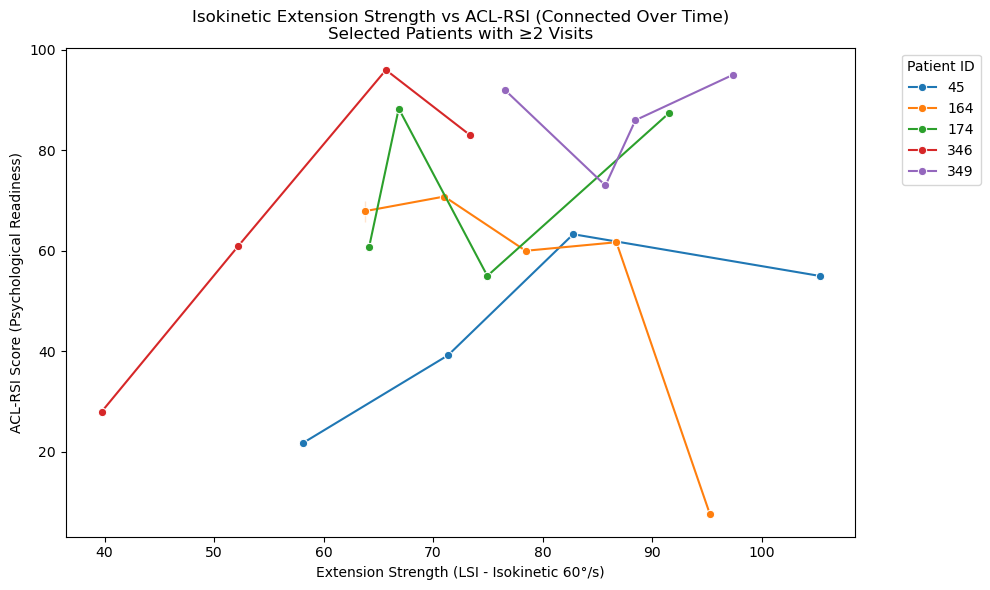

In [17]:
# Filter again but for isokinetic extension strength and ACL-RSI with at least 2 valid visits
df_iso_required = aclr.dropna(subset=['lsi_ext_isok_60', 'acl_rsi', 'tss'])

# Identify patients with at least 2 valid entries
patient_counts_iso = df_iso_required['record_id'].value_counts()
patients_with_2_iso = patient_counts_iso[patient_counts_iso >= 2].index

# Select the first 5 patients
selected_iso_patients = patients_with_2_iso[:5]
df_iso_selected = df_iso_required[df_iso_required['record_id'].isin(selected_iso_patients)]

# Plot: Isokinetic extension strength vs ACL-RSI
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_iso_selected,
    x='lsi_ext_isok_60',
    y='acl_rsi',
    hue='record_id',
    marker='o',
    palette='tab10'
)

plt.title("Isokinetic Extension Strength vs ACL-RSI (Connected Over Time)\nSelected Patients with ≥2 Visits")
plt.xlabel("Extension Strength (LSI - Isokinetic 60°/s)")
plt.ylabel("ACL-RSI Score (Psychological Readiness)")
plt.legend(title='Patient ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


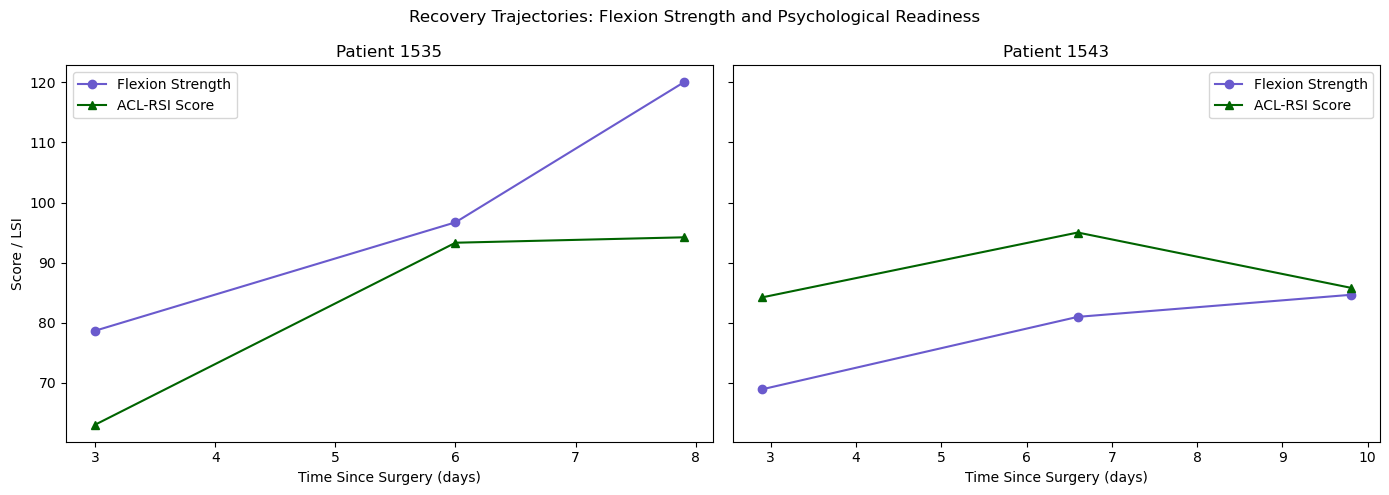

In [21]:
# Focus on just flexion strength, ACL-RSI, and time since surgery
df_flex_rsi = aclr.dropna(subset=['tss', 'lsi_flex_mvic_60', 'acl_rsi'])

# Find patients with at least 3 valid visits for those variables
valid_counts_flex = df_flex_rsi['record_id'].value_counts()
valid_ids_flex = valid_counts_flex[valid_counts_flex >= 3].index[:2]

# Filter for those patients
df_flex_traj = df_flex_rsi[df_flex_rsi['record_id'].isin(valid_ids_flex)]

# Plot: flexion strength and ACL-RSI over time for each patient
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for i, pid in enumerate(valid_ids_flex):
    df_p = df_flex_traj[df_flex_traj['record_id'] == pid]
    ax = axes[i]
    ax.plot(df_p['tss'], df_p['lsi_flex_mvic_60'], label='Flexion Strength', marker='o', color='slateblue')
    ax.plot(df_p['tss'], df_p['acl_rsi'], label='ACL-RSI Score', marker='^', color='darkgreen')
    ax.set_title(f"Patient {pid}")
    ax.set_xlabel("Time Since Surgery (days)")
    if i == 0:
        ax.set_ylabel("Score / LSI")
    ax.legend()

fig.suptitle("Recovery Trajectories: Flexion Strength and Psychological Readiness")
plt.tight_layout()
plt.show()


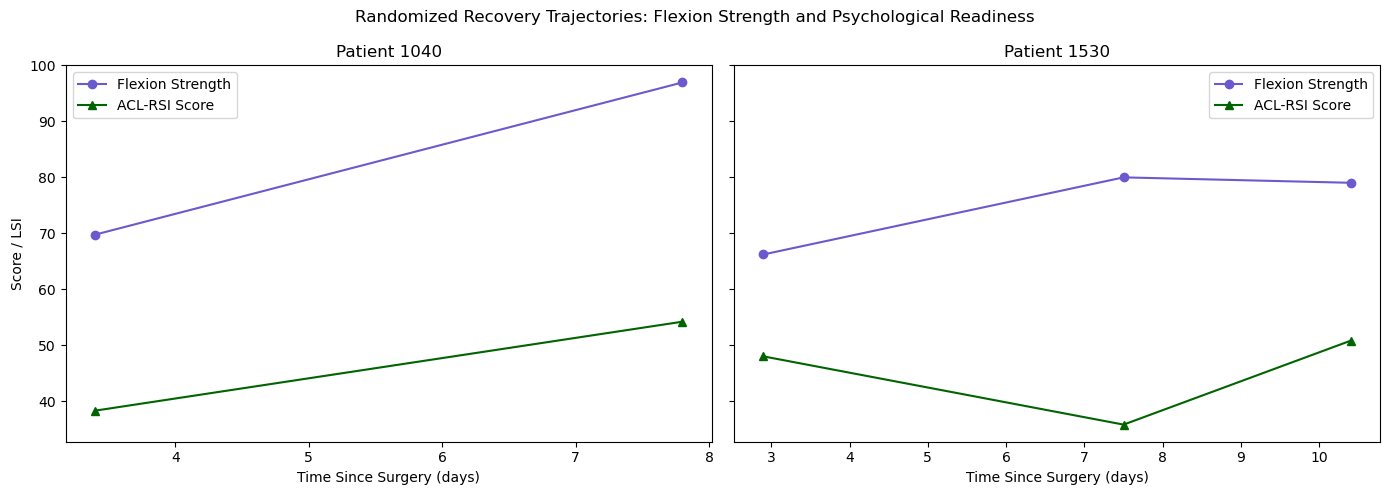

In [24]:
# Step 1: Find patients with at least 2 valid visits for flexion and ACL-RSI
valid_counts_2 = df_flex_rsi['record_id'].value_counts()
eligible_ids_2 = valid_counts_2[valid_counts_2 >= 2].index

# Step 2: Randomly select 2 patient IDs from this new list
np.random.seed(42)
random_ids_2 = np.random.choice(eligible_ids_2, size=2, replace=False)

# Step 3: Filter the DataFrame
df_random_patients_2 = df_flex_rsi[df_flex_rsi['record_id'].isin(random_ids_2)]

# Step 4: Plot their recovery trajectories
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for i, pid in enumerate(random_ids_2):
    df_p = df_random_patients_2[df_random_patients_2['record_id'] == pid]
    ax = axes[i]
    ax.plot(df_p['tss'], df_p['lsi_flex_mvic_60'], label='Flexion Strength', marker='o', color='slateblue')
    ax.plot(df_p['tss'], df_p['acl_rsi'], label='ACL-RSI Score', marker='^', color='darkgreen')
    ax.set_title(f"Patient {pid}")
    ax.set_xlabel("Time Since Surgery (days)")
    if i == 0:
        ax.set_ylabel("Score / LSI")
    ax.legend()

fig.suptitle("Randomized Recovery Trajectories: Flexion Strength and Psychological Readiness")
plt.tight_layout()
plt.show()
